EDA from suphie & corey: scatter plots 

In [1]:
from itertools import product
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
events = ["mile", "3000m", "5000m"]
gender = ["f", "m"]
years = list(np.arange(2016, 2023, 1))

combinations = list(product(events, gender, years))

# preprocess and concatenate data from all genders, events, and years
for event, gender, year in combinations:
    temp = pd.read_csv(f"data/{year}_{year+1}_{event}_{gender}.csv")
    # one-hot encode gender
    temp["gender"] = 0 if gender == "f" else 1

    # infer whether supershoes were worn based on year
    # (Nike Dragonfly released in Aug 2020)
    temp["supershoes"] = 1 if year >= 2021 else 0

    # maintain ordinal value for year (may need to scale later)
    temp["year"] = int(year)
    temp["yearOrdinal"] = int(year-2015)

    # add event column
    temp["event"] = event

    if year == 2016 and gender == "f" and event == "mile":
        data = temp
    else:
        data = pd.concat([data, temp], sort=False)

# Assign ordinal values to class year?
# fill NAN values with another class. 5 = other. 
# Typically this happens because of a redshirt season or later injury
# only happens for 6 people in whole dataset
data = data.rename(columns={"Year": "ClassYear"})
data["ClassYear"] = data["ClassYear"].str[0:2].map({"FR": 1, "SO": 2, "JR": 3, "SR": 4})
data["ClassYear"] = data["ClassYear"].fillna(5)

data["dummy"] = data["event"]
# add dummy variables for event
data = pd.get_dummies(data, columns=["dummy"])

In [3]:
data.head()

,Rank,Athlete,ClassYear,Team,Time,Meet,Meet_Date,Time_seconds,gender,supershoes,year,yearOrdinal,event,dummy_3000m,dummy_5000m,dummy_mile
0,1,"Edwards, Kaela",4.0,Oklahoma State,4:28.75,110th NYRR Millrose Games,"Feb 11, 2017",268.75,0,0,2016,1,mile,False,False,True
1,2,"Purrier, Elinor",3.0,New Hampshire,4:29.44,110th NYRR Millrose Games,"Feb 11, 2017",269.44,0,0,2016,1,mile,False,False,True
2,3,"Rivers, Danae",1.0,Penn State,4:32.55,2017 Husky Classic,"Feb 10, 2017",272.55,0,0,2016,1,mile,False,False,True
3,4,"Jones, Dani",2.0,Colorado,4:32.68\n@,Colorado Open,"Feb 2, 2017",272.68,0,0,2016,1,mile,False,False,True
4,5,"Cleirigh Buttner, Siofra",3.0,Villanova,4:33.16,Fastrack National Invite,"Feb 10, 2017",273.16,0,0,2016,1,mile,False,False,True


In [4]:
mile_data = data[data['dummy_mile'] == True ] 
m3000m_data = data[data['dummy_3000m'] == True]
m5000m_data = data[data['dummy_5000m'] == True]

events = [('Mile', mile_data), ('3000m', m3000m_data), ('5000m', m5000m_data)]

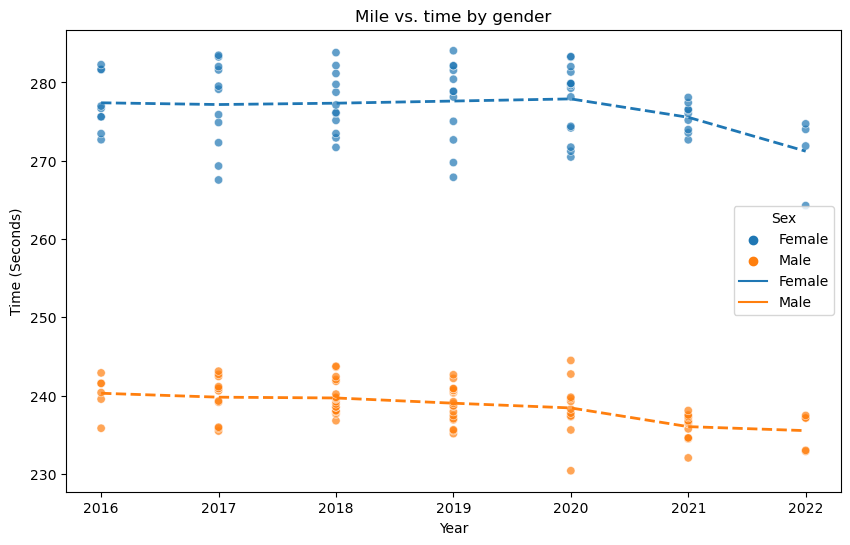

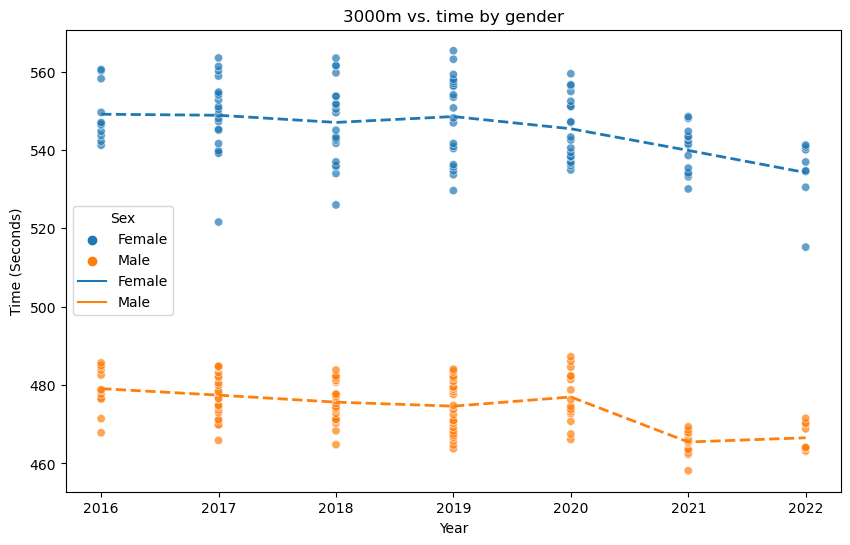

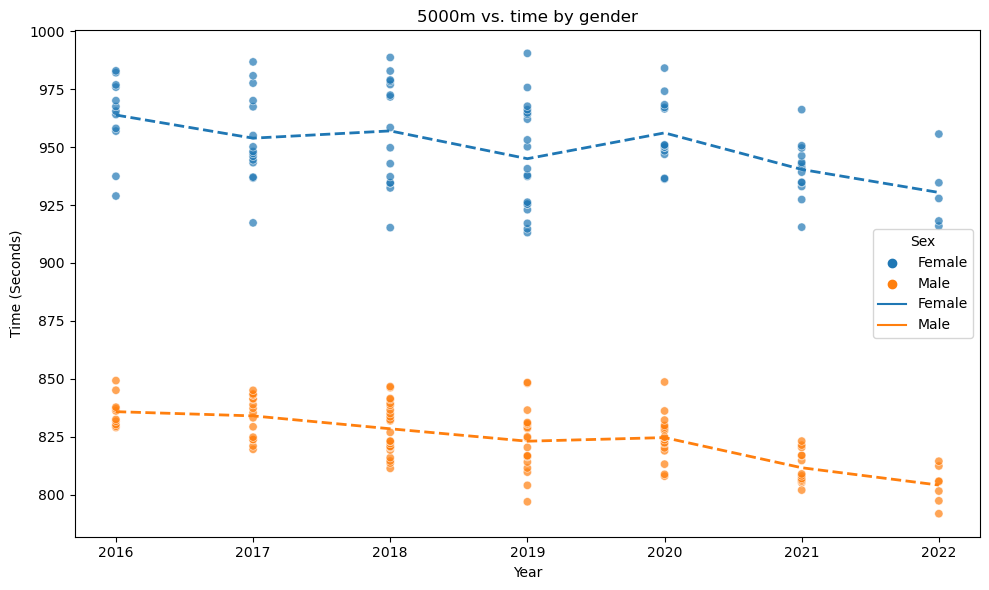

In [16]:
for event, event_data in events:
    plt.figure(figsize=(10, 6)) 
    
    # Scatter plot for both genders
    plot = sns.scatterplot(data=event_data, x='year', y='Time_seconds', hue='gender', alpha=0.7)
    sns.lineplot(data=event_data, x='year', y='Time_seconds', hue='gender', estimator='mean', ci=None, linestyle='--', linewidth=2)
    
    plt.xlabel('Year')
    plt.ylabel('Time (Seconds)')
    plt.title(f'{event} vs. time by gender')

    plot.legend_.texts[1].set_text('Male')
    plot.legend_.texts[0].set_text('Female')
    plot.legend_.texts[3].set_text('Male')
    plot.legend_.texts[2].set_text('Female')
    plot.legend_.set_title('Sex')
    
plt.tight_layout() 

In [6]:
# I wanted to look at duplicates of one person
data[['Last Name', 'First Name']] = data['Athlete'].str.split(', ', expand=True)

name_counts = data['Athlete'].value_counts()

print(name_counts)

Athlete
Kemboi, Amon         12
Gregory, Lauren      11
Hasz, Bethany        11
Logue, Cailie        10
Monson, Alicia       10
                     ..
Koekemoer, Travis     1
Mills, Ethan          1
Schroff, Andrew       1
Addison, Evan         1
Kiprop, Victor        1
Name: count, Length: 1249, dtype: int64


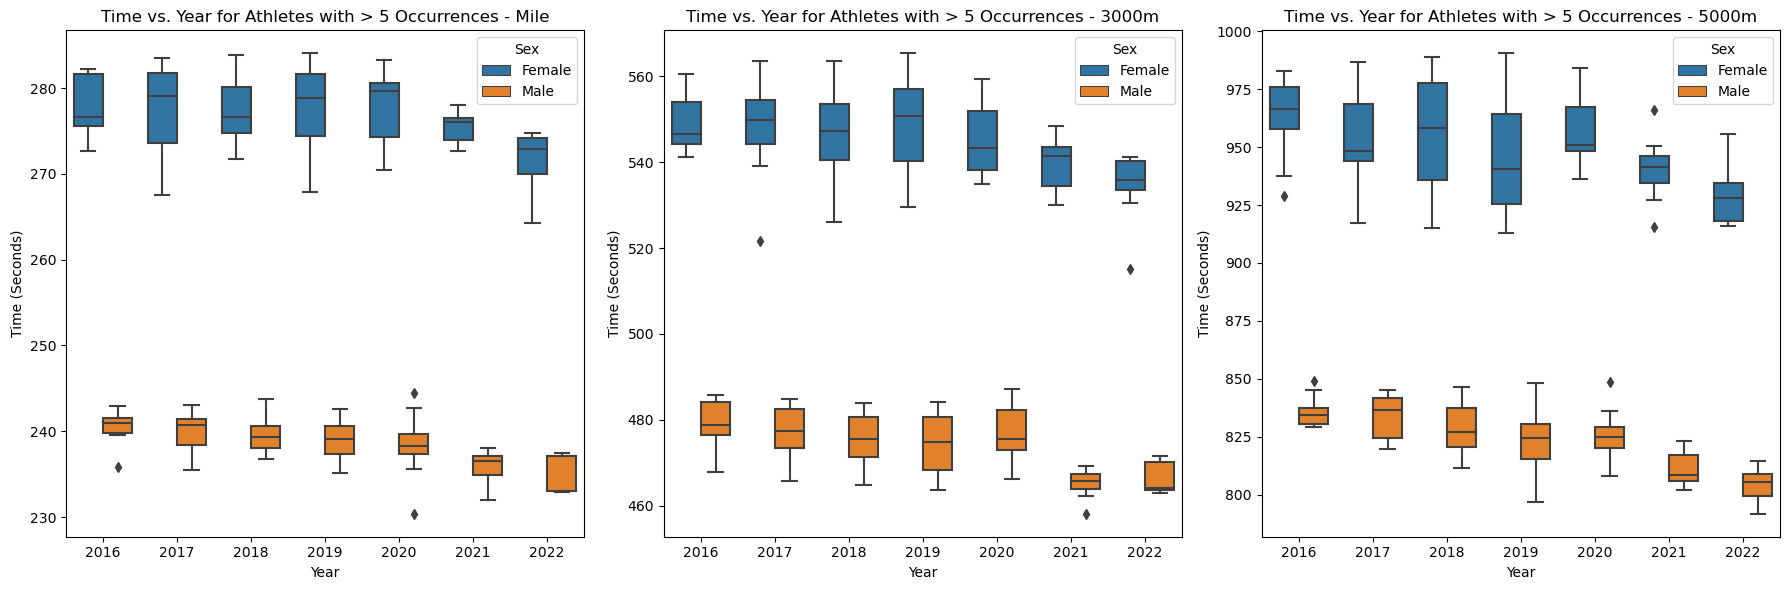

In [12]:
# Filter names with more than 5 occurrences
popular_names = name_counts[name_counts > 5].index
popular_names_data = data[data['Athlete'].isin(popular_names)]

# Define events and corresponding data
mile_data = popular_names_data[popular_names_data['dummy_mile']]
m3000m_data = popular_names_data[popular_names_data['dummy_3000m']]
m5000m_data = popular_names_data[popular_names_data['dummy_5000m']]

events = [('Mile', mile_data), ('3000m', m3000m_data), ('5000m', m5000m_data)]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (event, event_data) in zip(axes, events):
    plot = sns.boxplot(data=event_data, x='year', y='Time_seconds', hue='gender', ax=ax)

    plot.set_xlabel('Year')
    plot.set_ylabel('Time (Seconds)')
    plot.set_title(f'Time vs. Year for Athletes with > 5 Occurrences - {event}')
    plot.legend_.texts[1].set_text('Male')
    plot.legend_.texts[0].set_text('Female')
    plot.legend_.set_title('Sex')


plt.tight_layout()
plt.show()

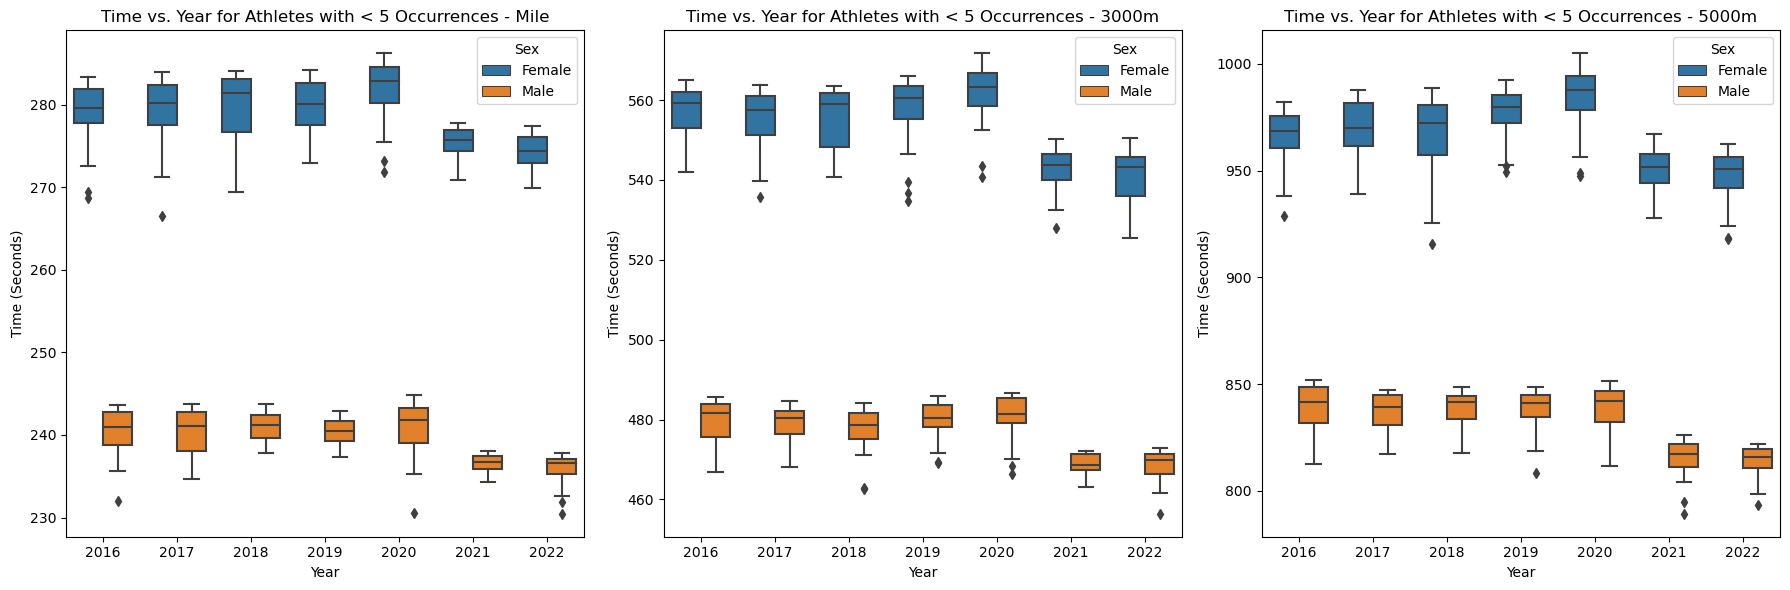

In [11]:
# Filter names with less than 5 occurrences
unpopular_names = name_counts[name_counts < 5].index
unpopular_names_data = data[data['Athlete'].isin(unpopular_names)]

mile_data = unpopular_names_data[unpopular_names_data['dummy_mile']]
m3000m_data = unpopular_names_data[unpopular_names_data['dummy_3000m']]
m5000m_data = unpopular_names_data[unpopular_names_data['dummy_5000m']]

events = [('Mile', mile_data), ('3000m', m3000m_data), ('5000m', m5000m_data)]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (event, event_data) in zip(axes, events):
    plot = sns.boxplot(data=event_data, x='year', y='Time_seconds', hue='gender', ax=ax)

    plot.set_xlabel('Year')
    plot.set_ylabel('Time (Seconds)')
    plot.set_title(f'Time vs. Year for Athletes with < 5 Occurrences - {event}')
    plot.legend_.texts[1].set_text('Male')
    plot.legend_.texts[0].set_text('Female')
    plot.legend_.set_title('Sex')


plt.tight_layout()
plt.show()

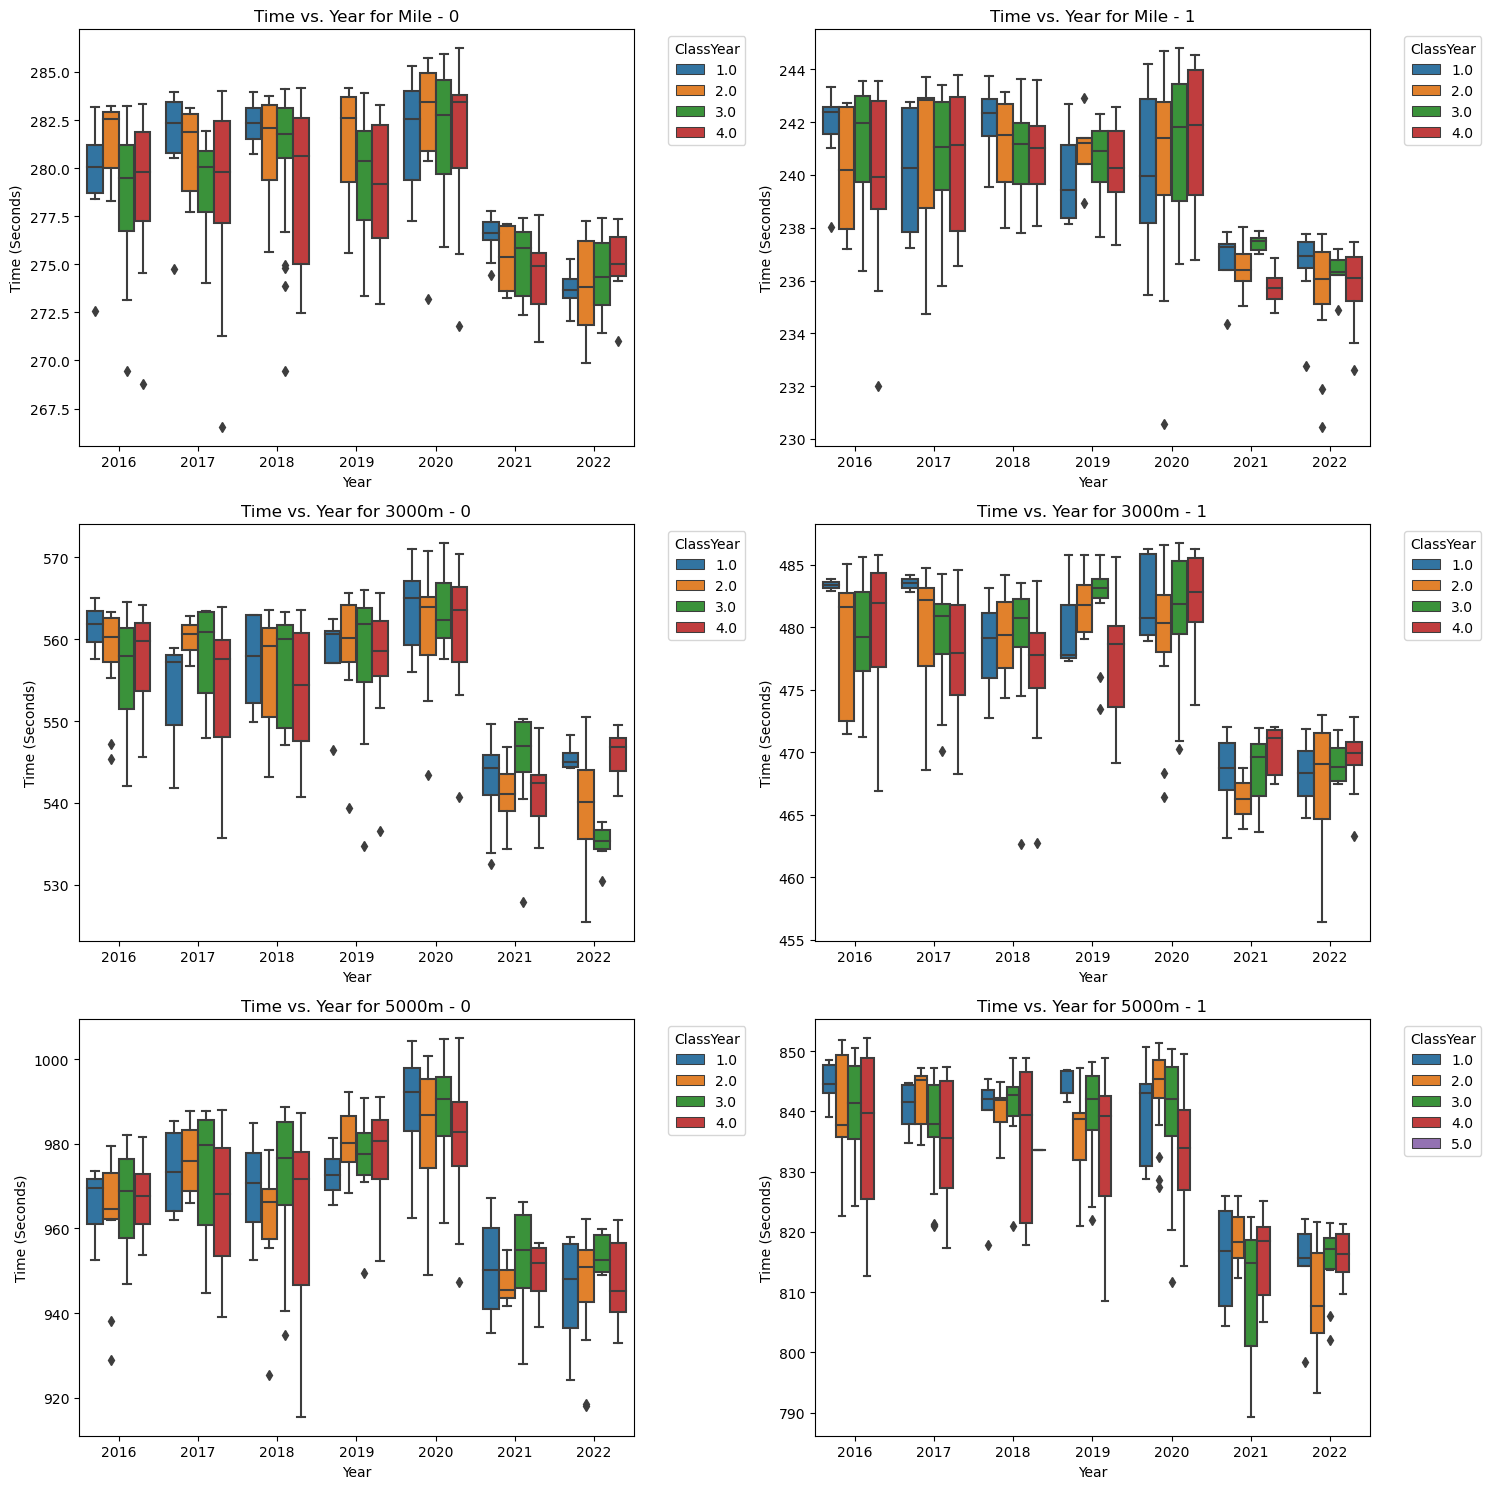

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, (event, event_data) in enumerate(events):
    for j, gender in enumerate([0, 1]):
        # Filter data for the current event and gender
        gender_data = event_data[event_data['gender'] == gender]
        

        sns.boxplot(x='year', y='Time_seconds', hue='ClassYear', data=gender_data, ax=axes[i * 2 + j])
        
        axes[i * 2 + j].set_xlabel('Year')
        axes[i * 2 + j].set_ylabel('Time (Seconds)')
        axes[i * 2 + j].set_title(f'Time vs. Year for {event} - {gender}')

        axes[i * 2 + j].legend(title='ClassYear', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

In [48]:
data['thirds'] = [0 if rank <= 16 else 1 if (rank > 16)&(rank<=33) else 2 for rank in data.Rank]

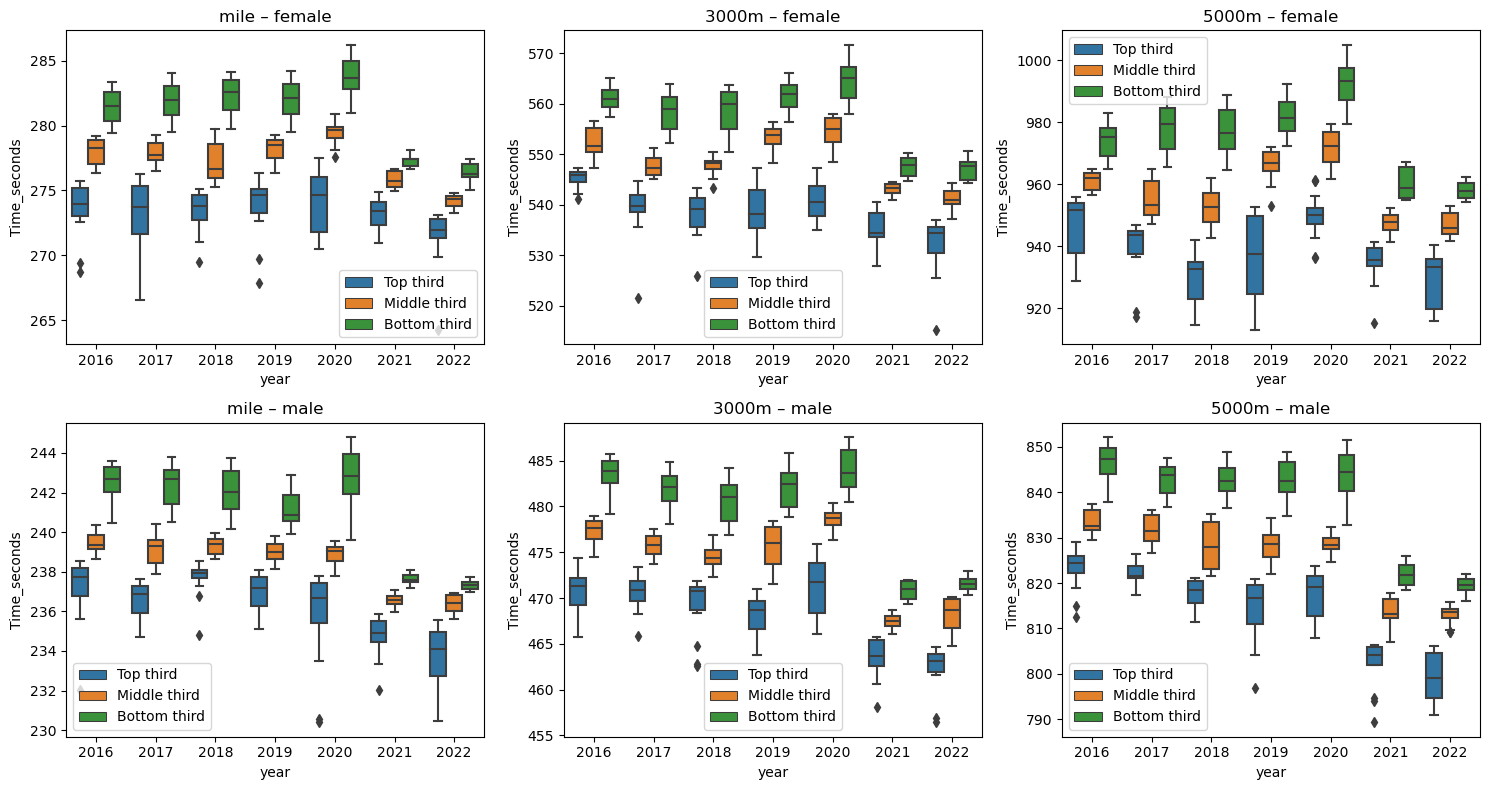

In [70]:
fig, axs = plt.subplots(2,3, figsize=(15,8))
axs = axs.ravel()

for gender in [0,1]:
    for i,event in enumerate(data.event.unique()):
        ax = axs[i+3*gender]
        sns.boxplot(data=data[(data.event==event) & (data.gender==gender)], x='year', y='Time_seconds', hue='thirds', ax=ax)

        if gender==0:
            ax.set_title(event+' – female')
        else:
            ax.set_title(event+' – male')

        ax.legend_.set_title('')
        ax.legend_.texts[0].set_text('Top third')
        ax.legend_.texts[1].set_text('Middle third')
        ax.legend_.texts[2].set_text('Bottom third')

plt.tight_layout()